# Модуль 3

Импортируем необходимые библиотеки


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from skimpy import skim
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

Загрузим тестовые данные


In [27]:
df_train = pd.read_csv('training_datasets/train_data.csv')


In [28]:
df_train.head()

,feature_1,feature_2,feature_3,label
0,1.750988e+04,-0.681507,0.750701,5
1,2.336432e+05,-0.584831,0.680264,5
2,3.160232e+07,-0.325012,0.299842,4
3,2.069916e+03,-0.533113,0.112504,2
4,1.653934e+09,0.224607,0.023237,3


Посмотрим подробнее на каждый столбец


In [218]:
skim(df_train)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2400   │ │ float64     │ 3     │                                                          │
│ │ Number of columns │ 4      │ │ int32       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_na ┃    ┃      ┃           ┃           ┃        ┃         ┃          ┃          ┃          ┃        ┃  │
│ ┃ me        ┃ NA ┃ NA % ┃ mean      ┃ sd        ┃ p0     ┃ p25     ┃ p50      ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ feature_1 │  0 │    0 │ 198200000 │ 562500000 │  148.5 │    9843 │   685500 │ 43610000 │ 35750000 │   ▇    │  │
│ │           │    │      │           │           │        │         │          │          │       00 │        │  │
│ │ feature_2 │  0 │    0 │ -0.001911 │    0.4649 │ -1.898 │ -0.2366 │ 0.003013 │    0.224 │    1.844 │  ▁▆▇▁  │  │
│ │ feature_3 │  0 │    0 │ -0.004838 │     0.465 │ -1.676 │ -0.2609 │ -0.00523 │   0.2373 │     1.99 │   ▂▇▃  │  │
│ │ label     │  0 │    0 │     3.034 │     1.719 │      0 │       2 │        4 │        5 │        5 │ ▃▃▅▃▇▇ │  │
│ └───────────┴────┴──────┴───────────┴───────────┴────────┴─────────┴──────────┴──────────┴──────────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Посмотрим на матрицу корреляции


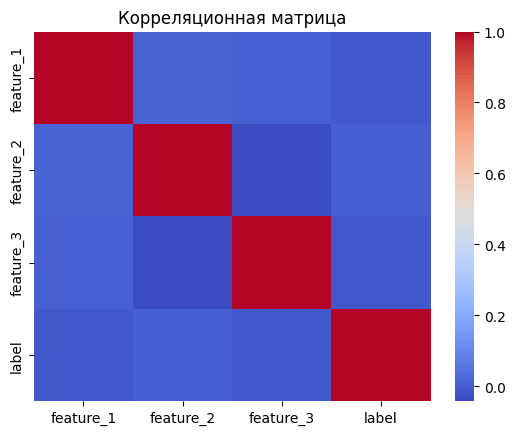

In [228]:
correlation_matrix = df_train.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

Посмотрим на boxplot для каждого столбца

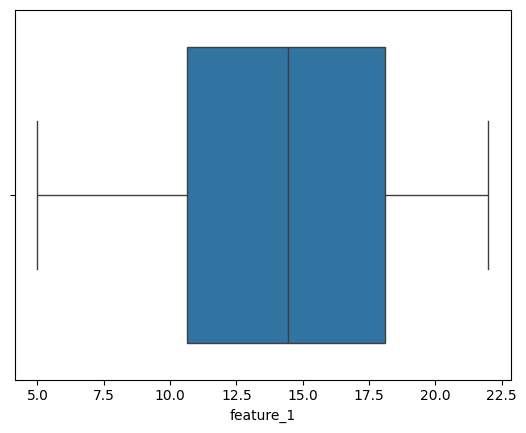

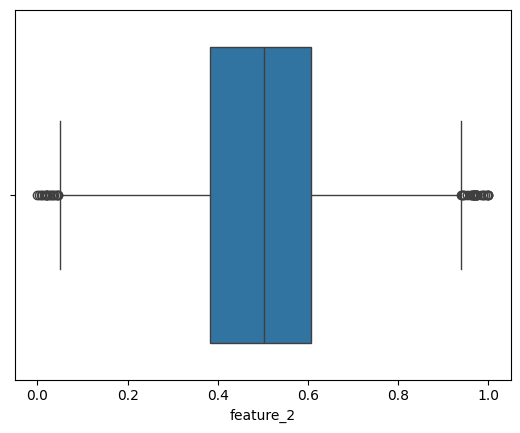

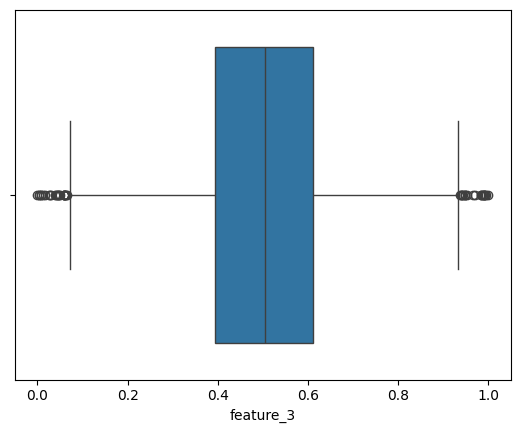

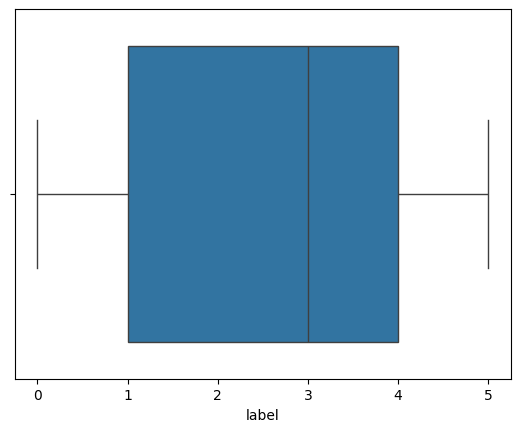

In [361]:
for column in df_train.columns:
    sns.boxplot(x=df_train[column])
    plt.show()

Очень сильный разброс по первому признаку, полагаю, к нему была применена математическая функция, которая в разы увеличивает значения. Предположу, что это экспонента, тогдп произведу обратное преобразование, возьму натуральный логарифм

In [31]:
def ln_x(x):
    return np.log(x)

In [144]:
df_train['feature_1'] = df_train['feature_1'].apply(ln_x)

Далее избавимся от выбросов 2 и 3 признака

In [ ]:
df_train['feature_1'] = df_train['feature_1'].apply(ln_x)
Q1 = df_train['feature_3'].quantile(0.25)
Q3 = df_train['feature_3'].quantile(0.75)
IQR = Q3 - Q1
v,n = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR  
df_train = df_train[(df_train['feature_3'] >= v) & (df_train['feature_3'] <= n)]
Q1 = df_train['feature_2'].quantile(0.25)
Q3 = df_train['feature_2'].quantile(0.75)
IQR = Q3 - Q1
v,n = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR  
df_train = df_train[(df_train['feature_2'] >= v) & (df_train['feature_2'] <= n)]

Отмасштабируем данные

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df_train[['feature_2', 'feature_3']])
df_train[['feature_2', 'feature_3']] = scaler.transform(df_train[['feature_2', 'feature_3']])

Все можно объединить в единую функцию


In [32]:
def prepare(df_train):
    df_train['feature_1'] = df_train['feature_1'].apply(ln_x)
    Q1 = df_train['feature_3'].quantile(0.25)
    Q3 = df_train['feature_3'].quantile(0.75)
    IQR = Q3 - Q1
    v,n = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR  
    df_train = df_train[(df_train['feature_3'] >= v) & (df_train['feature_3'] <= n)]
    Q1 = df_train['feature_2'].quantile(0.25)
    Q3 = df_train['feature_2'].quantile(0.75)
    IQR = Q3 - Q1
    v,n = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR  
    df_train = df_train[(df_train['feature_2'] >= v) & (df_train['feature_2'] <= n)]
    scaler = MinMaxScaler()
    scaler.fit(df_train[['feature_2', 'feature_3']])
    df_train[['feature_2', 'feature_3']] = scaler.transform(df_train[['feature_2', 'feature_3']])
    return df_train

Напишем функцию для тестовых данных

In [254]:
def prepare1(df_train):
    df_train['feature_1'] = df_train['feature_1'].apply(ln_x)
    scaler = MinMaxScaler()
    scaler.fit(df_train[['feature_2', 'feature_3']])
    df_train[['feature_2', 'feature_3']] = scaler.transform(df_train[['feature_2', 'feature_3']])
    return df_train

В качестве моделей используем GradientBoostingClassifier, CatBoostClassifier, BaggingClassifier, RandomForestClassifier


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

from catboost import CatBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [34]:
df_train = prepare(df_train)

Разобьем данные на тестовые и валидационные

In [247]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('label', axis = 1), df_train['label'], test_size=0.2, random_state=42)

Обучим случайный лес

In [248]:
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.7816901408450704

Обучим BaggingClassifier

In [249]:
clf = BaggingClassifier(n_estimators=10, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.755868544600939

Обучим GradientBoostingClassifier


In [250]:
lf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.755868544600939

Обучим CatBoostClassifier


In [251]:
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6)
model.fit(X_train, y_train, eval_set=(X_test, y_test))
model.score(X_test, y_test)

0:	learn: 1.7101486	test: 1.7247722	best: 1.7247722 (0)	total: 4.43ms	remaining: 4.43s
1:	learn: 1.6361550	test: 1.6565418	best: 1.6565418 (1)	total: 8.57ms	remaining: 4.28s
2:	learn: 1.5693933	test: 1.5936728	best: 1.5936728 (2)	total: 12.6ms	remaining: 4.19s
3:	learn: 1.5106850	test: 1.5394938	best: 1.5394938 (3)	total: 16.7ms	remaining: 4.15s
4:	learn: 1.4659860	test: 1.4959104	best: 1.4959104 (4)	total: 20.9ms	remaining: 4.15s
5:	learn: 1.4117277	test: 1.4443902	best: 1.4443902 (5)	total: 25ms	remaining: 4.14s
6:	learn: 1.3641511	test: 1.3999516	best: 1.3999516 (6)	total: 28.9ms	remaining: 4.11s
7:	learn: 1.3269619	test: 1.3671024	best: 1.3671024 (7)	total: 32.7ms	remaining: 4.05s
8:	learn: 1.2896067	test: 1.3341539	best: 1.3341539 (8)	total: 36.3ms	remaining: 4s
9:	learn: 1.2615432	test: 1.3064829	best: 1.3064829 (9)	total: 40ms	remaining: 3.96s
10:	learn: 1.2335585	test: 1.2829007	best: 1.2829007 (10)	total: 43.6ms	remaining: 3.92s
11:	learn: 1.2075874	test: 1.2587780	best: 1.258

0.892018779342723

Предварительно, лучшая модель - градиентный бустинг

In [35]:
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6)
model.fit(df_train.drop('label', axis = 1), df_train['label'])

0:	learn: 1.7046623	total: 6.74ms	remaining: 6.74s
1:	learn: 1.6273300	total: 11.9ms	remaining: 5.95s
2:	learn: 1.5579678	total: 17.1ms	remaining: 5.68s
3:	learn: 1.5071978	total: 21.8ms	remaining: 5.42s
4:	learn: 1.4504535	total: 25.6ms	remaining: 5.09s
5:	learn: 1.4021159	total: 29.4ms	remaining: 4.86s
6:	learn: 1.3633206	total: 33.3ms	remaining: 4.72s
7:	learn: 1.3202237	total: 37ms	remaining: 4.59s
8:	learn: 1.2933416	total: 40.7ms	remaining: 4.48s
9:	learn: 1.2588286	total: 44.2ms	remaining: 4.38s
10:	learn: 1.2307753	total: 47.9ms	remaining: 4.3s
11:	learn: 1.2038604	total: 51.4ms	remaining: 4.23s
12:	learn: 1.1739785	total: 54.9ms	remaining: 4.17s
13:	learn: 1.1470654	total: 58.5ms	remaining: 4.12s
14:	learn: 1.1302972	total: 62.1ms	remaining: 4.07s
15:	learn: 1.1077167	total: 65.7ms	remaining: 4.04s
16:	learn: 1.0892792	total: 69.2ms	remaining: 4s
17:	learn: 1.0742965	total: 72.7ms	remaining: 3.97s
18:	learn: 1.0622100	total: 76.3ms	remaining: 3.94s
19:	learn: 1.0457705	total: 

In [38]:
model.save_model("model1",
           format="cbm",
           export_parameters=None,
           pool=None)

In [41]:
from_file = CatBoostClassifier()

from_file.load_model("model1", format='cbm')

In [42]:
from_file.predict(df_train.drop('label', axis = 1))

array([[5],
       [5],
       [4],
       ...,
       [2],
       [5],
       [0]], dtype=int64)

Классифицируем тестовые данные

In [261]:
df_test = pd.read_csv('training_datasets/test_data.csv')

In [257]:
df1 = prepare1(df_test)

In [294]:
predictions = np.squeeze(model.predict(df1).reshape(1,800))

In [295]:
ans = pd.Series(predictions)

In [296]:
ans

0      0
1      2
2      3
3      3
4      3
      ..
795    4
796    4
797    4
798    3
799    1
Length: 800, dtype: int64

In [300]:
ans.to_csv('M3_submission1_Dvukraeva_Olga.csv', header=False, index=False)

# Задание 2 

Загрузим даннные

In [3]:
df1_train = pd.read_csv('training_datasets/train_shapes.csv')
df1_test = pd.read_csv('training_datasets/test_shapes.csv', encoding='utf-8')

In [4]:
df1_test.head(10)

,datetime,city,state,country,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,6/15/1999 10:00,johor bahru (malaysia),NaN,NaN,30,30 secs+,maybe a shadow of an invisible UFO. maybe ther...,8/28/2003,1.46343,103.754715
1,10/28/1998 10:30,detroit,mi,us,60,less than a minute,white bright circle hung in the sky for approx...,2/1/2007,42.3313889,-83.045833
2,4/3/2006 19:00,los angeles (highland park),ca,us,300,5 minutes,Dark spherical / ovoid object travelling east/...,5/15/2006,34.0522222,-118.242778
3,7/15/1960 01:00,la verne,ca,us,1800,30 min,July 1960&#44 Pomona Ca&#44 two yellowish ora...,12/12/2011,34.1008333,-117.766944
4,2/3/2009 20:50,anahuac,tx,us,1200,20 min,Stationery changing-form object in night sky w...,3/19/2009,29.7727778,-94.682500
5,1/30/2014 23:00,gray court,sc,us,60,1 minute,Triangle and cigar shaped &quot;stealth&quot; ...,2/7/2014,34.6080556,-82.113611
6,9/15/1995 22:00,la habra,ca,us,420.0,5 to 7 mins,UFO in sky with light blinking independent rin...,4/27/2007,33.9319444,-117.945278
7,11/2/2007 07:00,freehold,nj,us,20,20 sec.,Flying then disappeared in to sky,1/21/2008,40.2600000,-74.274167
8,3/16/2000 09:00,houston,tx,us,3,3 seconds,While taking-off in a 737&#44 I saw an object ...,9/15/2005,29.7630556,-95.363056
9,6/15/1996 22:00,coeur d&#39alene,id,us,180,3 minutes,3 flying objects that trailed one after the ot...,8/16/2002,47.6777778,-116.779444


In [303]:
skim(df1_train)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 62075  │ │ string      │ 9     │                                                          │
│ │ Number of columns │ 11     │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name    ┃ NA  ┃ NA %  ┃ mean     ┃ sd     ┃ p0       ┃ p25    ┃ p50     ┃ p75     ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ latitude       │   0 │     0 │    37.42 │  11.62 │   -82.86 │  34.03 │   39.21 │    42.7 │  71.39 │     ▇▁ │  │
│ │ longitude      │   0 │     0 │   -84.99 │  41.35 │   -176.7 │   -112 │  -87.65 │  -77.69 │  178.4 │  ▂▇▁   │  │
│ └────────────────┴─────┴───────┴──────────┴────────┴──────────┴────────┴─────────┴─────────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                         ┃ NA       ┃ NA %       ┃ words per row           ┃ total words        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ datetime                            │        0 │          0 │                       2 │             124150 │  │
│ │ city                                │        0 │          0 │                     1.6 │              99600 │  │
│ │ state                               │     5204 │       8.38 │                    0.92 │              56871 │  │
│ │ country                             │     8636 │      13.91 │                    0.86 │              53439 │  │
│ │ shape                               │     2034 │       3.28 │                    0.97 │              60041 │  │
│ │ duration (seconds)                  │        1 │          0 │                       1 │              62076 │  │
│ │ duration (hours/min)                │     2053 │       3.31 │                       2 │             123152 │  │
│ │ comments                            │       27 │       0.04 │                      14 │             893910 │  │
│ │ date posted                         │        0 │          0 │                       1 │              62075 │  │
│ └─────────────────────────────────────┴──────────┴────────────┴─────────────────────────┴────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Столбцы duration (hours/min), comments содеражат много информации, которую тяжело обрабатывать, поэтому удалим столбцы

Из столбца date posted получим день месяц и год, также преобразуем столбцы к числовому виду

In [5]:
def ln_x1(x):
    return np.log(x + 1)

In [6]:
def f(x):
    return x.split("/")

In [91]:
df1_train = df1_train.drop('date posted', axis = 1)

In [314]:
df1_train['shape'].value_counts()

shape
light        12435
triangle      5962
circle        5907
fireball      4592
unknown       4476
other         4441
disk          4143
sphere        4070
oval          2829
formation     1866
cigar         1581
changing      1501
flash         1035
rectangle      992
cylinder       963
diamond        906
chevron        709
egg            617
teardrop       578
cone           244
cross          182
delta            4
crescent         2
round            2
changed          1
flare            1
dome             1
pyramid          1
Name: count, dtype: int64

In [94]:
df1_train = df1_train.drop('city', axis = 1)

In [102]:
df1_train = df1_train.drop(df1_train[(df1_train['shape'] == 'delta') | (df1_train['shape'] == 'crescent') | (df1_train['shape'] == 'pyramid')
                            | (df1_train['shape'] == 'flare') | (df1_train['shape'] == 'round') | (df1_train['shape'] == 'changed')
                            | (df1_train['shape'] == 'dome') | (df1_train['shape'] == 'rectangle') | (df1_train['shape'] == 'cylinder')
                            | (df1_train['shape'] == 'diamond') | (df1_train['shape'] == 'chevron') | (df1_train['shape'] == 'egg')
                            | (df1_train['shape'] == 'teardrop') | (df1_train['shape'] == 'cone')
                            | (df1_train['shape'] == 'cross')].index)

In [108]:
df1_train['day'] = pd.to_numeric(df1_train['day'], errors='coerce')
df1_train['month'] = pd.to_numeric(df1_train['month'], errors='coerce')
df1_train['year'] = pd.to_numeric(df1_train['year'], errors='coerce')

In [106]:
df1_train = df1_train.dropna()

In [110]:
list_shape = df1_train['shape'].unique()
i = 0
dict_shape = {}
for shape in list_shape:
    dict_shape[shape] = i
    i += 1

In [112]:
df1_train = df1_train.drop('state', axis = 1)

Закодируем страну через onehot кодирование

In [122]:
one_hot = pd.get_dummies(df1_train['country'])
df1_train = df1_train.drop('country',axis = 1)
df1_train = df1_train.join(one_hot)

Функция обработки для тренировочной выборки

In [9]:
def prepare_data(df1_train):
    df1_train['duration (seconds)'] = pd.to_numeric(df1_train['duration (seconds)'], errors='coerce')
    df1_train['duration (seconds)'] = df1_train['duration (seconds)'].apply(ln_x1)

    df1_train = df1_train.drop('duration (hours/min)', axis = 1)
    df1_train = df1_train.drop('datetime', axis = 1)
    df1_train = df1_train.drop('comments', axis = 1)

    df1_train[['day','month', 'year']] = pd.DataFrame(df1_train['date posted'].apply(f).tolist())
    df1_train = df1_train.drop('date posted', axis = 1)
    df1_train = df1_train.drop('city', axis = 1)
    df1_train = df1_train.drop(df1_train[(df1_train['shape'] == 'delta') | (df1_train['shape'] == 'crescent') | (df1_train['shape'] == 'pyramid')
                            | (df1_train['shape'] == 'flare') | (df1_train['shape'] == 'round') | (df1_train['shape'] == 'changed')
                            | (df1_train['shape'] == 'dome') | (df1_train['shape'] == 'rectangle') | (df1_train['shape'] == 'cylinder')
                            | (df1_train['shape'] == 'diamond') | (df1_train['shape'] == 'chevron') | (df1_train['shape'] == 'egg')
                            | (df1_train['shape'] == 'teardrop') | (df1_train['shape'] == 'cone')
                            | (df1_train['shape'] == 'cross')].index)
    df1_train['day'] = pd.to_numeric(df1_train['day'], errors='coerce')
    df1_train['month'] = pd.to_numeric(df1_train['month'], errors='coerce')
    df1_train['year'] = pd.to_numeric(df1_train['year'], errors='coerce')
    df1_train = df1_train.dropna()
    list_shape = df1_train['shape'].unique()
    i = 0
    dict_shape = {}
    for shape in list_shape:
        dict_shape[shape] = i
        i += 1
    df1_train = df1_train.drop('state', axis = 1)
    df1_train = df1_train.replace(dict_shape)
    one_hot = pd.get_dummies(df1_train['country'])
    df1_train = df1_train.drop('country',axis = 1)
    df1_train = df1_train.join(one_hot)
    return df1_train, dict_shape

In [18]:
def prepare_test(df1_train):
    df1_train['duration (seconds)'] = pd.to_numeric(df1_train['duration (seconds)'], errors='coerce')
    df1_train['duration (seconds)'] = df1_train['duration (seconds)'].apply(ln_x1)
    df1_train = df1_train.drop('duration (hours/min)', axis = 1)
    df1_train = df1_train.drop('datetime', axis = 1)
    df1_train = df1_train.drop('comments', axis = 1)
    df1_train[['day','month', 'year']] = pd.DataFrame(df1_train['date posted'].apply(f).tolist())
    df1_train = df1_train.drop('date posted', axis = 1)
    df1_train = df1_train.drop('city', axis = 1)
    df1_train['day'] = pd.to_numeric(df1_train['day'], errors='coerce')
    df1_train['month'] = pd.to_numeric(df1_train['month'], errors='coerce')
    df1_train['year'] = pd.to_numeric(df1_train['year'], errors='coerce')
    df1_train = df1_train.drop('state', axis = 1)
    one_hot = pd.get_dummies(df1_train['country'])
    df1_train = df1_train.drop('country',axis = 1)
    df1_train = df1_train.join(one_hot)
    df1_train = df1_train.drop('de',axis = 1)
    return df1_train

In [8]:
df, dict = prepare_data(df1_train)

C:\Users\student.WIN\AppData\Local\Temp\ipykernel_72708\2930080252.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1_train = df1_train.replace(dict_shape)


In [26]:
df

,shape,duration (seconds),latitude,longitude,day,month,year,au,ca,gb,us
1,0,1.791759,42.473333,-83.221944,11,16,2002,False,False,False,True
2,1,1.791759,29.563889,-95.025278,2,14,2010,False,False,False,True
3,2,0.000000,38.104167,-122.255556,10,30,2006,False,False,False,True
4,3,4.110874,26.270833,-80.270833,10,11,2005,False,False,False,True
5,4,1.098612,42.065278,-71.248333,12,12,2011,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
62070,11,2.397895,47.913056,-122.096944,1,28,1999,False,False,False,True
62071,8,3.433987,33.394167,-110.785833,12,2,2000,False,False,False,True
62072,12,3.433987,48.015278,-122.062500,12,2,2013,False,False,False,True
62073,6,2.772589,41.850556,-87.793611,3,18,2014,False,False,False,True


In [328]:
dict

{'other': 0,
 'unknown': 1,
 'triangle': 2,
 'disk': 3,
 'flash': 4,
 'oval': 5,
 'light': 6,
 'sphere': 7,
 'circle': 8,
 'cigar': 9,
 'fireball': 10,
 'formation': 11,
 'changing': 12}

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('shape', axis = 1), df['shape'], test_size=0.2, random_state=42)

In [342]:
clf1 = RandomForestClassifier(random_state=0).fit(X_train, y_train)
clf1.score(X_test, y_test)

0.1721832529592284

In [14]:
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6)
model.fit(X_train, y_train, eval_set=(X_test, y_test))
model.score(X_test, y_test)

0:	learn: 2.5188735	test: 2.5198915	best: 2.5198915 (0)	total: 158ms	remaining: 2m 38s
1:	learn: 2.4837267	test: 2.4858465	best: 2.4858465 (1)	total: 182ms	remaining: 1m 30s
2:	learn: 2.4552578	test: 2.4584152	best: 2.4584152 (2)	total: 207ms	remaining: 1m 8s
3:	learn: 2.4329069	test: 2.4378725	best: 2.4378725 (3)	total: 231ms	remaining: 57.6s
4:	learn: 2.4159875	test: 2.4221048	best: 2.4221048 (4)	total: 259ms	remaining: 51.6s
5:	learn: 2.4016394	test: 2.4086729	best: 2.4086729 (5)	total: 283ms	remaining: 46.9s
6:	learn: 2.3889569	test: 2.3969572	best: 2.3969572 (6)	total: 307ms	remaining: 43.6s
7:	learn: 2.3776177	test: 2.3861858	best: 2.3861858 (7)	total: 330ms	remaining: 40.9s
8:	learn: 2.3690301	test: 2.3789696	best: 2.3789696 (8)	total: 355ms	remaining: 39.1s
9:	learn: 2.3609007	test: 2.3716604	best: 2.3716604 (9)	total: 381ms	remaining: 37.7s
10:	learn: 2.3545858	test: 2.3663507	best: 2.3663507 (10)	total: 408ms	remaining: 36.6s
11:	learn: 2.3488616	test: 2.3619739	best: 2.36197

0.22665497588776853

In [323]:
clf = BaggingClassifier(n_estimators=10, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.15322227093380097

In [20]:
df2.head(13350)

,duration (seconds),latitude,longitude,day,month,year,au,ca,gb,us
0,3.433987,1.46343,103.754715,8,28,2003,False,False,False,False
1,4.110874,42.3313889,-83.045833,2,1,2007,False,False,False,True
2,5.707110,34.0522222,-118.242778,5,15,2006,False,False,False,True
3,7.496097,34.1008333,-117.766944,12,12,2011,False,False,False,True
4,7.090910,29.7727778,-94.682500,3,19,2009,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
13345,7.090910,41.9583333,-70.667778,10,12,2001,False,False,False,True
13346,4.110874,34.3916667,-118.541667,11,8,2003,False,False,False,True
13347,6.398595,40.0455556,-86.008611,2,27,2014,False,False,False,True
13348,5.707110,42.8858333,-87.863056,7,19,2010,False,False,False,True


In [22]:

df2['latitude'] = df2['latitude'].apply(lambda x: float(x.replace("q","0")))

In [19]:
df2 = prepare_test(df1_test)

In [25]:
predictions = np.squeeze(model.predict(df2).reshape(1,25716))

In [26]:
ans = pd.Series(predictions)

In [27]:
ans.to_csv('M3_submission2_Dvukraeva_Olga.csv', header=False, index=False)